<a href="https://colab.research.google.com/github/ahmedSadoun/colab-project/blob/main/final_densenet_NIH.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
! pip install -q kaggle
from google.colab import files
files.upload()
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json

Saving kaggle.json to kaggle.json


In [ ]:
!kaggle datasets download -d bakerman1879/data-entry-2017-v2020csv

  0% 0.00/957k [00:00<?, ?B/s]
100% 957k/957k [00:00<00:00, 65.6MB/s]


In [ ]:
import zipfile
zf = "/content/data-entry-2017-v2020csv.zip"
target_dir = "/content/dataset/data"
zfile = zipfile.ZipFile(zf)
zfile.extractall(target_dir)


In [ ]:

!pip install wget


import pathlib
import glob
import urllib.request
import wget
import os
import cv2
import random
import math

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf

from keras.preprocessing import image

from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split 

from tensorflow.keras import datasets , layers , models
from tensorflow.keras.layers import Dense,GlobalAveragePooling2D,Convolution2D,BatchNormalization
from tensorflow.keras.layers import Flatten,MaxPooling2D,Dropout

from tensorflow.keras.applications import DenseNet121
from tensorflow.keras.applications.densenet import preprocess_input

from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,img_to_array

from tensorflow.keras.models import Model

from tensorflow.keras.optimizers import Adam

from tensorflow.keras.callbacks import ModelCheckpoint, ReduceLROnPlateau

import warnings
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
from glob import glob
%matplotlib inline
import matplotlib.pyplot as plt
import tensorflow as tf
warnings.filterwarnings("ignore")



# Download the 56 zip files in Images_png in batches 
links = [
    'https://nihcc.box.com/shared/static/vfk49d74nhbxq3nqjg0900w5nvkorp5c.gz'#,
  #  'https://nihcc.box.com/shared/static/i28rlmbvmfjbl8p2n3ril0pptcmcu9d1.gz',
  #  'https://nihcc.box.com/shared/static/f1t00wrtdk94satdfb9olcolqx20z2jp.gz',
#   'https://nihcc.box.com/shared/static/0aowwzs5lhjrceb3qp67ahp0rd1l1etg.gz',
#    'https://nihcc.box.com/shared/static/v5e3goj22zr6h8tzualxfsqlqaygfbsn.gz',
#   'https://nihcc.box.com/shared/static/asi7ikud9jwnkrnkj99jnpfkjdes7l6l.gz',
#   'https://nihcc.box.com/shared/static/jn1b4mw4n6lnh74ovmcjb8y48h8xj07n.gz',
#   'https://nihcc.box.com/shared/static/tvpxmn7qyrgl0w8wfh9kqfjskv6nmm1j.gz',
#   'https://nihcc.box.com/shared/static/upyy3ml7qdumlgk2rfcvlb9k6gvqq2pj.gz',
#   'https://nihcc.box.com/shared/static/l6nilvfa9cg3s28tqv1qc1olm3gnz54p.gz',
#   'https://nihcc.box.com/shared/static/hhq8fkdgvcari67vfhs7ppg2w6ni4jze.gz',
#   'https://nihcc.box.com/shared/static/ioqwiy20ihqwyr8pf4c24eazhh281pbu.gz'
]
for idx, link in enumerate(links):
    fn = 'images_%02d.tar.gz' % (idx+1)
    print('downloading'+fn+'...')
    urllib.request.urlretrieve(link, fn)  # download the zip file

print("Download complete...")





!tar -x -f '/content/images_01.tar.gz'
#!tar -x -f '/content/images_02.tar.gz'
#!tar -x -f '/content/images_03.tar.gz'
#!tar -x -f '/content/images_04.tar.gz'
#!tar -x -f '/content/images_05.tar.gz'
#!tar -x -f '/content/images_06.tar.gz'
#!tar -x -f '/content/images_07.tar.gz'
#!tar -x -f '/content/images_08.tar.gz'
#!tar -x -f '/content/images_09.tar.gz'
#!tar -x -f '/content/images_10.tar.gz'
#!tar -x -f '/content/images_12.tar.gz'
#!tar -x -f '/content/images_12.tar.gz'



  Created wheel for wget: filename=wget-3.2-cp37-none-any.whl size=9681 sha256=a941302ec7639b68db226e458c14a4d9ad5c43f422c5bc31efc9f5027243d353
  Stored in directory: /root/.cache/pip/wheels/40/15/30/7d8f7cea2902b4db79e3fea550d7d7b85ecb27ef992b618f3f
Successfully built wget
downloadingimages_01.tar.gz...
Download complete...


In [ ]:

from tqdm import tqdm

In [ ]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from glob import glob
import os
import matplotlib.gridspec as gridspec
import matplotlib.ticker as ticker
sns.set_style('whitegrid')
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
from keras.layers import Input
from keras.models import Model
from keras.layers import Dense
from keras.optimizers import Adam
#from generator import DataGenerator
import keras

In [ ]:
all_xray_df = pd.read_csv('../content/dataset/data/Data_Entry_2017_v2020.csv')
all_image_paths = {os.path.basename(x): x for x in 
                   glob(os.path.join('..', 'content','images*', '*.png'))}
print('Scans found:', len(all_image_paths), ', Total Headers', all_xray_df.shape[0])

all_xray_df['path'] = all_xray_df['Image Index'].map(all_image_paths.get)
all_xray_df['path'] = all_xray_df['Image Index'].map(all_image_paths.get)
all_xray_df['path'] = all_xray_df['path'].astype(str)

#all_xray_df['Patient Age'] = all_xray_df['Patient Age'].map(lambda x: int(x[:-1]))
all_xray_df.sample(3)


Scans found: 4999 , Total Headers 112335


,Image Index,Finding Labels,Follow-up #,Patient ID,Patient Age,Patient Gender,View Position,OriginalImage[Width,Height],OriginalImagePixelSpacing[x,y],path
22466,00005962_018.png,No Finding,18.0,5962.0,31.0,M,AP,2500.0,2048.0,0.168,0.168,None
75600,00018554_000.png,Fibrosis,2.0,18554.0,35.0,M,PA,3056.0,2544.0,0.139,0.139,None
86790,00021409_007.png,No Finding,6.0,21409.0,25.0,M,PA,2798.0,2991.0,0.143,0.143,None


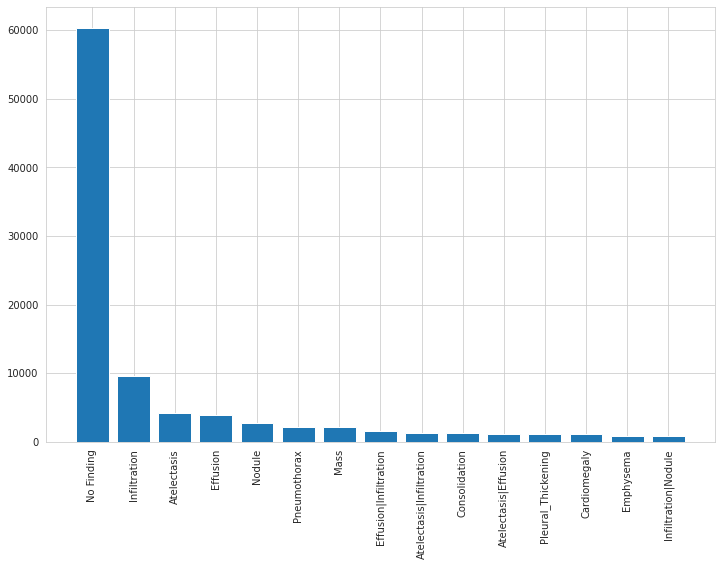

In [ ]:
label_counts = all_xray_df['Finding Labels'].value_counts()[:15]
fig, ax1 = plt.subplots(1,1,figsize = (12, 8))
ax1.bar(np.arange(len(label_counts))+0.5, label_counts)
ax1.set_xticks(np.arange(len(label_counts))+0.5)
_ = ax1.set_xticklabels(label_counts.index, rotation = 90)

In [ ]:
all_xray_df['Finding Labels'] = all_xray_df['Finding Labels'].map(lambda x: x.replace('No Finding', ''))


from itertools import chain
all_labels = np.unique(list(chain(*all_xray_df['Finding Labels'].map(lambda x: x.split('|')).tolist())))
all_labels = [x for x in all_labels if len(x)>0]
print('All Labels ({}): {}'.format(len(all_labels), all_labels))
for c_label in all_labels:
    if len(c_label)>1:
        all_xray_df[c_label] = all_xray_df['Finding Labels'].map(lambda finding: 1.0 if c_label in finding else 0)
all_xray_df.sample(3)

All Labels (15): ['Atelectasis', 'COVID-19', 'Cardiomegaly', 'Consolidation', 'Edema', 'Effusion', 'Emphysema', 'Fibrosis', 'Hernia', 'Infiltration', 'Mass', 'Nodule', 'Pleural_Thickening', 'Pneumonia', 'Pneumothorax']


,Image Index,Finding Labels,Follow-up #,Patient ID,Patient Age,Patient Gender,View Position,OriginalImage[Width,Height],OriginalImagePixelSpacing[x,y],path,Atelectasis,COVID-19,Cardiomegaly,Consolidation,Edema,Effusion,Emphysema,Fibrosis,Hernia,Infiltration,Mass,Nodule,Pleural_Thickening,Pneumonia,Pneumothorax
94226,00024022_000.png,,0.0,24022.0,31.0,M,PA,2866.0,2991.0,0.143,0.143,None,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
66863,00016522_009.png,,7.0,16522.0,28.0,M,AP,2500.0,2048.0,0.168,0.168,None,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
45976,00011770_010.png,Effusion,10.0,11770.0,64.0,F,PA,2048.0,2500.0,0.168,0.168,None,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:

MIN_CASES = 1000
all_labels = [c_label for c_label in all_labels if all_xray_df[c_label].sum()>MIN_CASES]
print('Clean Labels ({})'.format(len(all_labels)), 
      [(c_label,int(all_xray_df[c_label].sum())) for c_label in all_labels])

Clean Labels (13) [('Atelectasis', 11559), ('Cardiomegaly', 2776), ('Consolidation', 4667), ('Edema', 2303), ('Effusion', 13317), ('Emphysema', 2516), ('Fibrosis', 1686), ('Infiltration', 19894), ('Mass', 5782), ('Nodule', 6331), ('Pleural_Thickening', 3385), ('Pneumonia', 1431), ('Pneumothorax', 5302)]


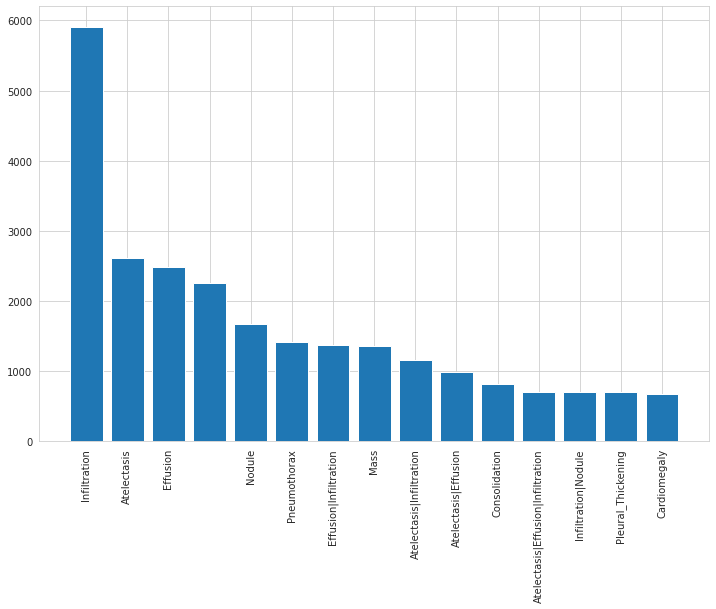

In [ ]:

sample_weights = all_xray_df['Finding Labels'].map(lambda x: len(x.split('|')) if len(x)>0 else 0).values + 4e-2
sample_weights /= sample_weights.sum()
all_xray_df = all_xray_df.sample(40000, weights=sample_weights)

label_counts = all_xray_df['Finding Labels'].value_counts()[:15]
fig, ax1 = plt.subplots(1,1,figsize = (12, 8))
ax1.bar(np.arange(len(label_counts))+0.5, label_counts)
ax1.set_xticks(np.arange(len(label_counts))+0.5)
_ = ax1.set_xticklabels(label_counts.index, rotation = 90)

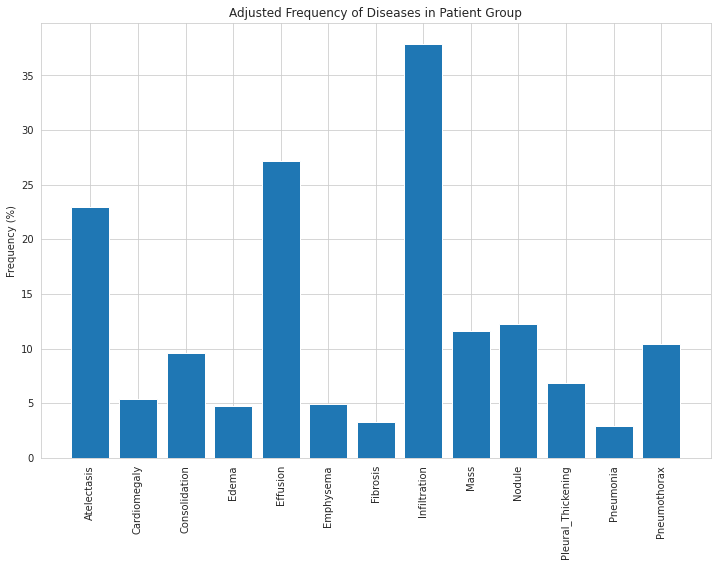

In [ ]:
label_counts = 100*np.mean(all_xray_df[all_labels].values,0)
fig, ax1 = plt.subplots(1,1,figsize = (12, 8))
ax1.bar(np.arange(len(label_counts))+0.5, label_counts)
ax1.set_xticks(np.arange(len(label_counts))+0.5)
ax1.set_xticklabels(all_labels, rotation = 90)
ax1.set_title('Adjusted Frequency of Diseases in Patient Group')
_ = ax1.set_ylabel('Frequency (%)')

In [ ]:
all_xray_df['disease_vec'] = all_xray_df.apply(lambda x: [x[all_labels].values], 1).map(lambda x: x[0])

In [ ]:
from sklearn.model_selection import train_test_split
train_df, valid_df = train_test_split(all_xray_df, 
                                   test_size = 0.20, 
                                   random_state = 2018,
                                   stratify = all_xray_df['Finding Labels'].map(lambda x: x[:4])
                                     )
print('train', train_df.shape[0], 'validation', valid_df.shape[0])

train 32000 validation 8000


In [ ]:
valid_df['newLabel'] = valid_df.apply(lambda x: x['Finding Labels'].split('|'), axis=1)
train_df['newLabel'] = train_df.apply(lambda x: x['Finding Labels'].split('|'), axis=1)

In [ ]:
from keras.preprocessing.image import ImageDataGenerator
IMG_SIZE = (128, 128)
core_idg = ImageDataGenerator()
#core_idg = ImageDataGenerator(samplewise_center=True, 
 #                             samplewise_std_normalization=True, 
  #                            horizontal_flip = True, 
   #                           vertical_flip = False, 
    #                          height_shift_range= 0.05, 
     #                         width_shift_range=0.1, 
      #                        rotation_range=5, 
       #                       shear_range = 0.1,
        #                      zoom_range=0.15)

In [ ]:
train_gen = core_idg.flow_from_dataframe(dataframe=train_df, 
                             directory=None,
                             x_col = 'path',
                            y_col = 'newLabel', 
                            classes = all_labels,
                            target_size = IMG_SIZE,
                             color_mode = 'rgb',
                            batch_size = 16)

valid_gen = core_idg.flow_from_dataframe(dataframe=valid_df, 
                             directory=None,
                             x_col = 'path',
                            y_col = 'newLabel', 
                            classes = all_labels,
                            target_size = IMG_SIZE,
                             color_mode = 'rgb',
                            batch_size = 32) 

test_X, test_Y = next(core_idg.flow_from_dataframe(dataframe=valid_df, 
                             directory=None,
                             x_col = 'path',
                            y_col = 'newLabel', 
                            classes = all_labels,
                            target_size = IMG_SIZE,
                             color_mode = 'rgb',
                            batch_size = 8000))

Found 1264 validated image filenames belonging to 13 classes.
Found 321 validated image filenames belonging to 13 classes.
Found 321 validated image filenames belonging to 13 classes.


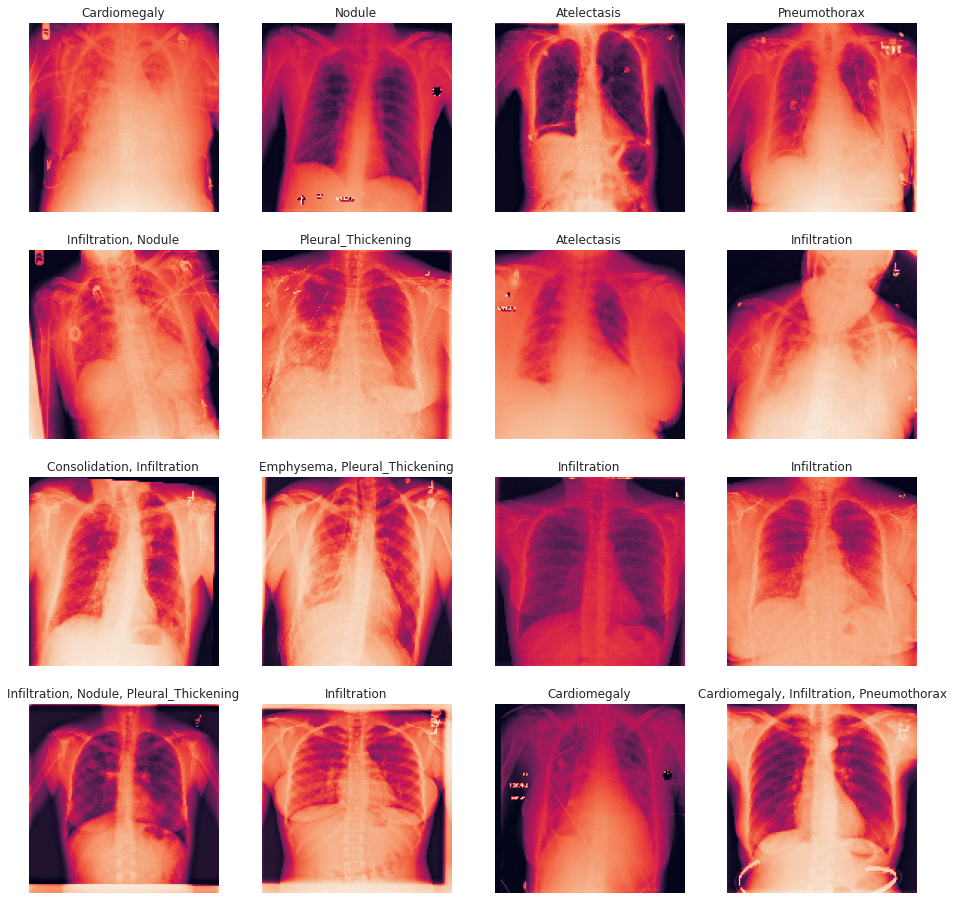

In [ ]:
t_x, t_y = next(train_gen)
fig, m_axs = plt.subplots(4, 4, figsize = (16, 16))
for (c_x, c_y, c_ax) in zip(t_x, t_y, m_axs.flatten()):
    c_ax.imshow(c_x[:,:,0])
    c_ax.set_title(', '.join([n_class for n_class, n_score in zip(all_labels, c_y) 
                             if n_score>0.5]))
    c_ax.axis('off')

In [ ]:
from keras.applications.densenet import DenseNet121, preprocess_input


In [ ]:
# dense net model
img_in = Input(t_x.shape[1:])              
model = DenseNet121(include_top= False , 
                weights="imagenet",     
                input_tensor= img_in, 
                input_shape= t_x.shape[1:],
                pooling ='avg') 

x = model.output  
predictions = Dense(len(all_labels), activation="sigmoid", name="predictions")(x)   
model = Model(inputs=img_in, outputs=predictions)

In [ ]:
optimizer = Adam(lr=0.001)
model.compile(optimizer=optimizer, loss="binary_crossentropy", metrics=[keras.metrics.binary_accuracy])


In [ ]:

from keras.callbacks import ModelCheckpoint
from tensorflow.keras.callbacks import EarlyStopping,ReduceLROnPlateau
early = EarlyStopping(monitor="loss", mode="min",min_delta = 0,
                          patience = 3,
                          verbose = 1,
                          restore_best_weights = True)
learning_rate_reduction = ReduceLROnPlateau(monitor='loss', patience = 2, verbose=1,factor=0.3, min_lr=0.000001)


checkpointer = ModelCheckpoint(filepath='weights.best.{epoch:02d}-{val_loss:.2f}.hdf5', verbose=1, save_best_only = True)
callbacks_list = [ early, learning_rate_reduction]

In [ ]:
history = model.fit_generator(train_gen, 
                                  steps_per_epoch=70,
                                  validation_steps=1,
                                  validation_data = valid_gen, 
                                  epochs = 1000 , callbacks = callbacks_list)

Epoch 1/1000
70/70 [==============================] - 18s 255ms/step - loss: 0.3444 - binary_accuracy: 0.8700 - val_loss: 0.3604 - val_binary_accuracy: 0.8654
Epoch 2/1000
70/70 [==============================] - 18s 250ms/step - loss: 0.3377 - binary_accuracy: 0.8705 - val_loss: 0.3611 - val_binary_accuracy: 0.8630
Epoch 3/1000
70/70 [==============================] - 18s 250ms/step - loss: 0.3322 - binary_accuracy: 0.8714 - val_loss: 1.0817 - val_binary_accuracy: 0.8077
Epoch 4/1000
70/70 [==============================] - 18s 251ms/step - loss: 0.3277 - binary_accuracy: 0.8738 - val_loss: 0.4330 - val_binary_accuracy: 0.8486
Epoch 5/1000
70/70 [==============================] - 18s 251ms/step - loss: 0.3217 - binary_accuracy: 0.8756 - val_loss: 0.6514 - val_binary_accuracy: 0.8245
Epoch 6/1000
70/70 [==============================] - 18s 251ms/step - loss: 0.3186 - binary_accuracy: 0.8749 - val_loss: 84.6528 - val_binary_accuracy: 0.4784
Epoch 7/1000
70/70 [=========================

In [ ]:
#########################################
y_pred = model.predict(test_X) 

In [ ]:
#########################################
# look at how often the algorithm predicts certain diagnoses 
for c_label, p_count, t_count in zip(all_labels, 
                                     100*np.mean(y_pred,0), 
                                     100*np.mean(test_Y,0)):
    print('%s: actual: %2.2f%%, predicted: %2.2f%%' % (c_label, t_count, p_count))

Atelectasis: actual: 23.05%, predicted: 22.31%
Cardiomegaly: actual: 6.85%, predicted: 7.00%
Consolidation: actual: 13.71%, predicted: 6.25%
Edema: actual: 3.12%, predicted: 2.40%
Effusion: actual: 27.41%, predicted: 23.06%
Emphysema: actual: 6.54%, predicted: 3.99%
Fibrosis: actual: 6.85%, predicted: 6.14%
Infiltration: actual: 38.63%, predicted: 35.72%
Mass: actual: 7.79%, predicted: 6.64%
Nodule: actual: 11.21%, predicted: 4.25%
Pleural_Thickening: actual: 8.72%, predicted: 3.58%
Pneumonia: actual: 2.18%, predicted: 1.59%
Pneumothorax: actual: 11.53%, predicted: 9.07%


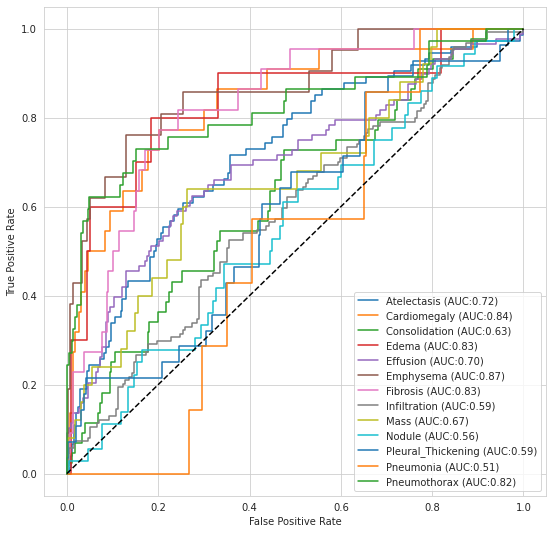

In [ ]:

from sklearn.metrics import roc_curve, auc
fig, c_ax = plt.subplots(1,1, figsize = (9, 9))
for (idx, c_label) in enumerate(all_labels):
    fpr, tpr, thresholds = roc_curve(test_Y[:,idx].astype(int), y_pred[:,idx])
    c_ax.plot(fpr, tpr, label = '%s (AUC:%0.2f)'  % (c_label, auc(fpr, tpr)))
c_ax.legend()
plt.plot([0, 1], [0, 1], 'k--')
c_ax.set_xlabel('False Positive Rate')
c_ax.set_ylabel('True Positive Rate')
fig.savefig('trained_net.png')

In [ ]:

from sklearn.metrics import roc_auc_score
from sklearn.metrics import  accuracy_score
roc_auc_score(test_Y.astype(int), y_pred)


0.7036986980684226

In [ ]:
model.evaluate(test_X,test_Y)

11/11 [==============================] - 2s 45ms/step - loss: 0.6462 - binary_accuracy: 0.8665


[0.6462408900260925, 0.8665228486061096]

In [ ]:
model.save("/content/drive/MyDrive/densenet121NIH.h5")